## HR Analysis - Employee Churn

#### After much struggle with my original dataset and ideas, I had to fall back to a contingency plan, still focusing on my main idea of churn, but instead for employee turnover and retention, rather than company contractural churn. 

#### My original idea was to use a real life dataset from my work but I came across two challenges, I was not given ideal data for the challenge of predicting churn, and I ran security risks if I did not conceal the data. 

In [1]:
# import initial needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in our data

df = pd.read_csv("HR_Dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [4]:
# need to change 'Departments ' to 'Departments'

df.rename(columns = {'Departments ':'Departments'}, inplace = True)

In [5]:
df.shape

(14999, 10)

In [6]:
# use df.info() to get some information on our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Departments and Salary are both object: categorical variables that will 
# need to be transformed before moving on to prediction
# lets take a look at the values within these columns

print(df.salary.unique())


['low' 'medium' 'high']


In [8]:
print(df.Departments.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


##### Ordinal variables have two or more categories which can be ranked and ordered

##### Nominal variables have two or more categories which do not have an intrinsic order

##### Salary: Ordinal
##### Department: Nominal

##### The dataset I chose has no missing values, it is best practice in HR Departments to have all personal info on employees on file, but the process in which a the data is collected and stored can have an impact on its accuracy.

In [9]:
# start transforming categorical variables to numeric
# in the case of ordinal variables we can convert them into a respective numeric value
# encoding the salary column
# first changing the data type to categorical
df.salary = df.salary.astype('category')

In [10]:
# the ordinal values are low, medium, and high in this order
df.salary = df.salary.cat.reorder_categories(['low', 'medium', 'high'])

In [11]:
# encode the values to make integer
df.salary = df.salary.cat.codes

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [13]:
# next we have to transform the nominal variable departments and save them inside a new dataframe
# using pandas get dummies I will transform the values in departments column
#  there is no rank between departments, so encoding approach is not useful anymore
# to avoid the dummy trap I will use the drop_first parameter 

df1 = pd.get_dummies(df.Departments, drop_first=True)

In [14]:
# new dataframe where each row is a separate employee with 1s in front of their respective department
# and zeros in all other places

df1.head()

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [15]:
# need to drop the old department column 

df = df.drop("Departments", axis=1)

# join the new dataframe df1 to the dataset

df = df.join(df1)

In [16]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [17]:
# the variable that tells us whether the employee has churned or not 
# is in the column left
# 1 = churn
# 0 = has not churned
# I will need to calculate the turnover rate percentage by counting the times 1 and 0 occured and divide by total


In [18]:
# total number of observations in the dataset for employees 
n_employees = len(df)

In [19]:
# number of employees who have churned or not
print(df.left.value_counts())    # have not churned = 11,428, churn = 3,571

0    11428
1     3571
Name: left, dtype: int64


In [20]:
# percentage of employees churn/not churn
print(df.left.value_counts()/n_employees*100)

0    76.191746
1    23.808254
Name: left, dtype: float64


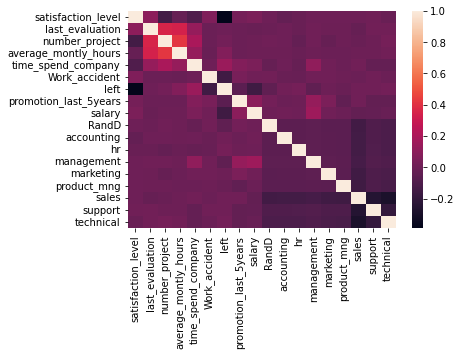

In [21]:
# now I need to look at correlations or variables that are in a positive
# or negative linear relationship with the target variable

corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

In [22]:
# in the heat map, you can see that left has the most filled in,
# or highest negative correlation with satisfaction level
# in otherwords, inversely correlated, increase in satisfaction, means decrease in the probability an employee will churn

In [23]:
# split the data
target = df.left
features = df.drop("left",axis=1)
from sklearn.model_selection import train_test_split

In [24]:
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25, random_state=42)

In [26]:
# employee churn is a binary classification problem, one algorithm that works 
# well with this type of problem is Decision tree model
# decision trees have accurate predictions and can help with understanding the reasons employees churn
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
#instantiate the decision tree classifier and set a random state
# limiting the max depth to 5 levels, to prevent overfitting
clf = DecisionTreeClassifier(max_depth=5, random_state=42) # random state does not affect the model results but ensures you get the same results second time around

In [31]:
# now that the model is set up, we can use the fit() method to fit our features to the target
# will also use .treee_.node_count to get the number of nodes in the tree
clf.fit(features_train, target_train).tree_.node_count

45

In [32]:
# to test how good the tree is making predictions we need to calculate
# the accuracy score of the prediction using score()
# because we developed the model on the training set, we calculate accuracy score on the test set
clf.score(features_test,target_test)*100

97.06666666666666

In [33]:
clf.score(features_train,target_train)*100

97.71535247577563

In [ ]:
# accuracy score dropped a bit when limiting the growth of the tree,
# but the difference between shows that we reduced overfitting and the model will act more realisiticly 

In [35]:
# giving features_test, data poitns where I havent given the model the answers to
# but I want to get the answers that the model comes up with

clfpredictions = clf.predict(features_test)
clfpredictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
# whole dataset had nearly 15,000 rows, we set aside 3750 for testing
# when we do predictions, its going to give us the class number that it is predictin, so 0 or 1, churn or not churn
# so for the first three as you can see from the array above the model is predicting 0, they did not churn
# this is a way to see generally how the model is predicting on the new information that its giving you
features_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
6723,0.65,0.96,5,226,2,1,0,1,0,0,0,0,1,0,0,0,0
6473,0.88,0.80,3,166,2,0,0,0,0,0,0,0,0,0,0,0,0
4679,0.69,0.98,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0
862,0.41,0.47,2,154,3,0,0,0,0,0,0,0,0,0,1,0,0
7286,0.87,0.76,5,254,2,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,0.99,0.37,6,219,6,0,0,0,0,0,0,0,0,1,0,0,0
12541,0.81,0.87,4,254,5,0,0,0,0,0,0,0,1,0,0,0,0
2656,0.67,0.59,3,177,3,1,0,0,0,0,0,0,0,0,0,0,0
6759,0.22,0.57,5,174,6,0,0,2,0,0,0,0,0,0,0,0,1


In [39]:
# so we have the predictions for the test instances but how will we know if the predictions are good or not? we have to compare to the actual information
# by using our performance metrics

from sklearn.metrics import accuracy_score
accuracy_score(target_test, clfpredictions)*100

97.06666666666666

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, clfpredictions, labels=[0,1])

# if the class is 0 and is predicted as 0, this happened 2812 times
# when the class is 1 and predicted as 1 this happened 828 times
# wrongly classified instances FP=69, and FN 41

array([[2812,   41],
       [  69,  828]], dtype=int64)

In [46]:
# our precision score 

from sklearn.metrics import precision_score
precision_score(target_test, clfpredictions)*100

95.2819332566168

In [47]:
# recall score
# True positives over the sum of True positives and False negatives
# if our goal is mostly focused on those who are churning, then you probably
# want to have less false negatives, people who leave in reality but your algorthim is not able to predict it
# for that reason recall can be useful
# higher values of recall correspond lower values of false negatives
# recall score 92%, of correct predictions among 1s(churners)

from sklearn.metrics import recall_score
recall_score(target_test, clfpredictions)*100

92.3076923076923

In [ ]:
# we want to be able to correctly predict churn, so recall score is our target
#  but recall score is not enough,because only targeting one lass the 1s we might have low accuracy for our 0s, 
# people who did not churn
# so I want to use a measure that is not concentrated on just one class or the other
# AUC score if we want to target both churners and non churners
# Area Under Curve and is basically a compound measure that is maximized when
# both recall and specificity are maximized
# using AUC as a target to maximize, the model will try to correctly classify both
# 1s and 0s keeping an eye on recall and specificity at the same time
# 


In [48]:
from sklearn.metrics import roc_auc_score

In [50]:
prediction = clf.predict(features_test)
roc_auc_score(target_test, prediction)*100

95.43530426811185

In [53]:
new_model = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)

In [55]:
new_model.fit(features_train, target_train).tree_.node_count

47

In [56]:
# print the accuracy score of the new model
print(new_model.score(features_test, target_test)*100)

93.70666666666668


In [63]:
# print the recall score for new model
print(recall_score(target_test, clfpredictions)*100)

92.3076923076923


In [ ]:
# how do we decide what the max_depth or other parameters should be?
# we can simply do this by trying different values and find the one that provides the
# best predictions
# to find the optimal parameters we can create a grid (referenced sklearn documentation), 
# of values we want to test to find the values that will give us the highest accuracy
# with hyperparameter tuning we also want to validate the model on different test components
# using cross validationa


In [86]:
# grid search and cross validation for hyperparameter tuning
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf,features,target,cv=10))

[0.98       0.97133333 0.97266667 0.97333333 0.97133333 0.97266667
 0.97933333 0.96866667 0.96866667 0.96731154]


In [87]:
# generate values for maximum depth
depth = [i for i in range(5,21,1)]

In [88]:
# generate values for minimum sample size
samples = [i for i in range(50,500,50)]

In [89]:
# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [90]:
# import grid search from sklearn
from sklearn.model_selection import GridSearchCV

In [91]:
param_search = GridSearchCV(clf, parameters)

In [92]:
param_search.fit(features_train, target_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20],
                         'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350,
                                              400, 450]})

In [93]:
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [94]:
# feature importance
# what are the important features that drive the decision to leave the company?
# sklearn can calculate the feature importance
# in sklearn, importances are scaled up to equal 100%
# the higher the percentage the higher the importance
# if you find that a feature is not important at all, you should drop it and run the model without that feature

In [96]:
# lets find the features in our data
feature_names = list(features)
feature_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [98]:
# one of the best things about decision trees is its interpretability 
# so you can understand how the decision tree is making its decisions
# so we can see which features are more important than the others

feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names, columns=["importance"])
feature_importance.sort_values(by="importance", ascending=False)

,importance
satisfaction_level,0.535522
time_spend_company,0.152146
last_evaluation,0.151002
number_project,0.097404
average_montly_hours,0.062417
technical,0.001510
promotion_last_5years,0.000000
salary,0.000000
Work_accident,0.000000
accounting,0.000000


<AxesSubplot:>

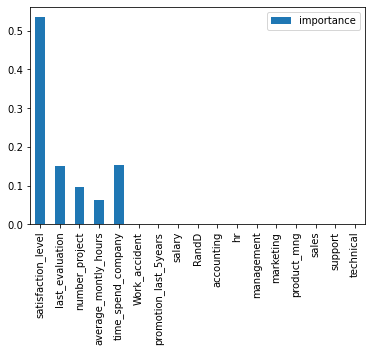

In [102]:
feature_importance.plot(kind='bar')

In [103]:
# now that we can see what features are important 
# we need to select those features that have the importance above 1%
selected_features = feature_importance[feature_importance.importance>0.01]

In [104]:
# create a list from those features
selected_list = selected_features.index

In [105]:
# transform both features_train and features_test components
# to include onlhy selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

In [133]:
# I now have the most important features, along with the optimal parameters we found earlier
# so now I have to redo the model for predicting churn with these new features and parameters
# (adjusted to get higher accuracy)
best_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf = 100, class_weight="balanced", random_state=42)

In [134]:
# fit this new model with only the selected features
best_model.fit(features_train_selected, target_train).tree_.node_count

41

In [135]:
# make a new prediction based on the important features from the test set
best_prediction = best_model.predict(features_test_selected)

In [136]:
# lets see the general accuracy of the best_model
print(best_model.score(features_test_selected, target_test)*100)

95.62666666666667


In [137]:
# recall score of best_model
print(recall_score(target_test, best_prediction)*100)

92.08472686733556


In [138]:
# print ROC/AUC score of the best_model
print(roc_auc_score(target_test, best_prediction)*100)

94.4125001318802


In [141]:
# time to visualize the decision tree
# import from sklearn
from sklearn import tree
from matplotlib import pyplot as plt

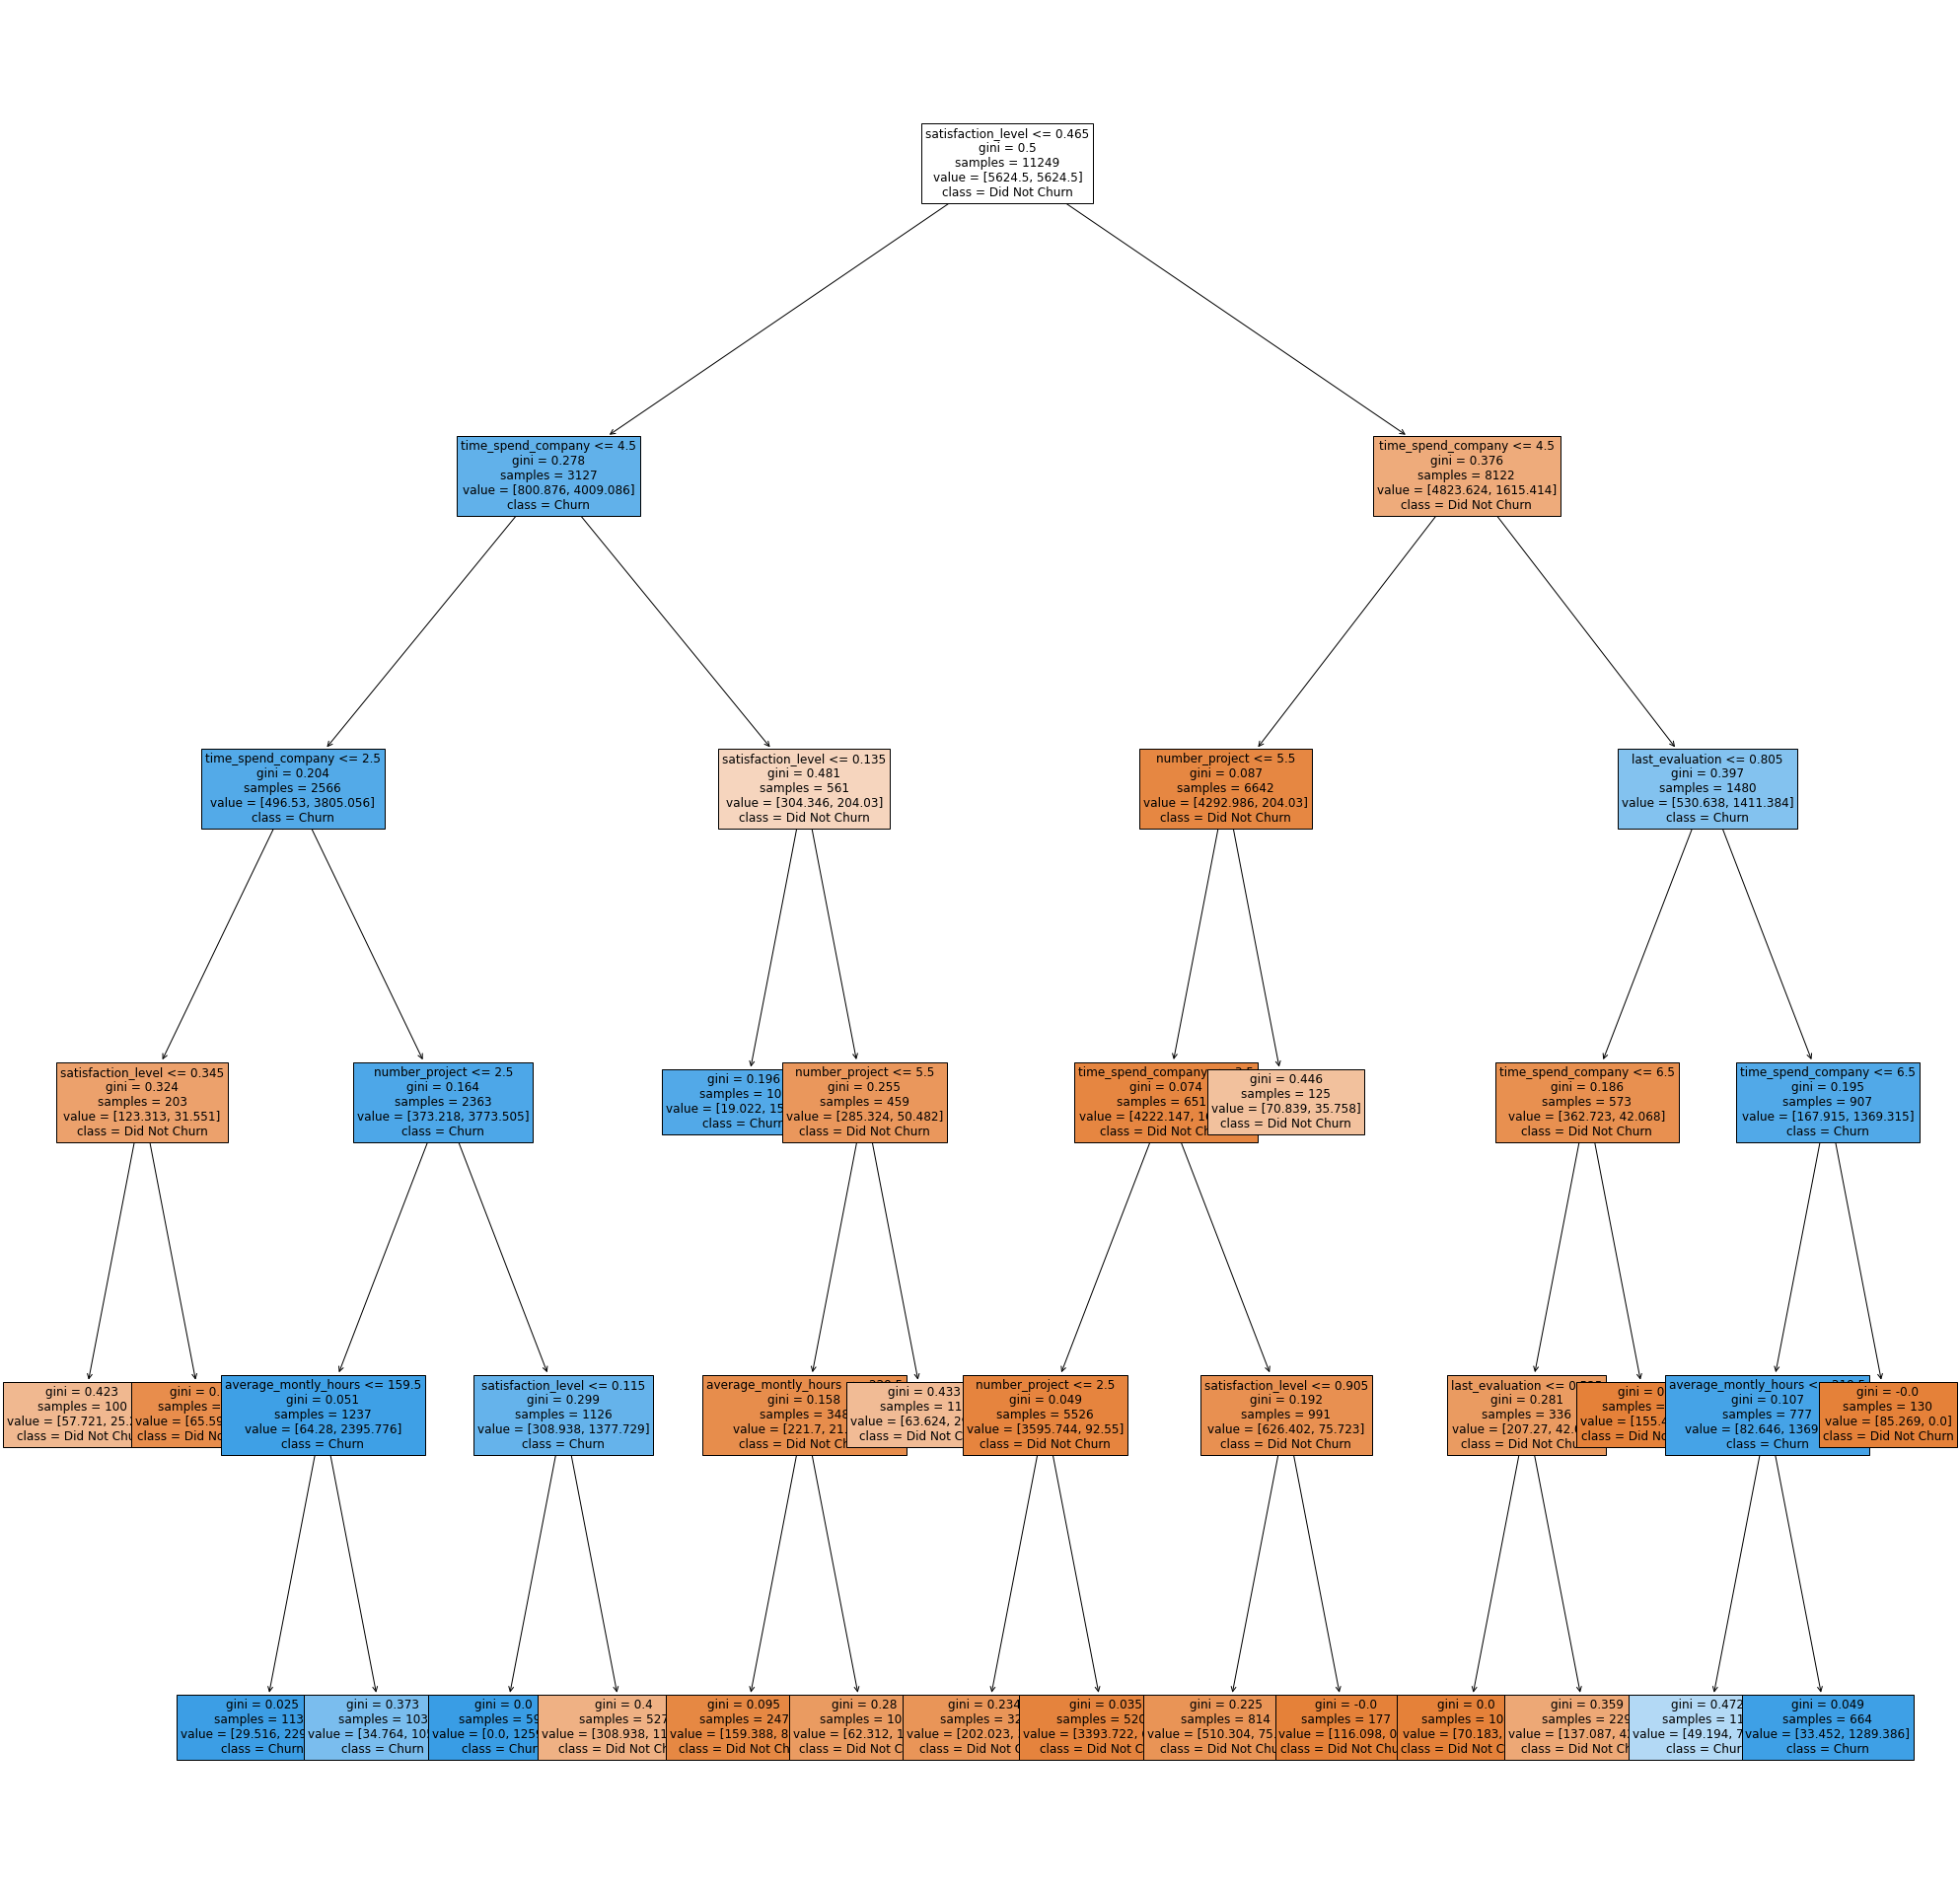

In [149]:
fig = plt.figure(figsize=(35,35))
_ = tree.plot_tree(best_model,
                  feature_names=feature_names,
                  class_names={0:'Did Not Churn', 1:'Churn'},
                   filled=True,
                   fontsize=12)

# our most important feature = satisfaction_level
# we created a plot of the tree, which is an actual representation of how the tree decides 
# for example we can see the root node, if satisfaction_level <=0.465, if its lower, it branches off to the left as a churn, 
# if its higher, it branches off to the right, on to the next decision point and so on. 

In [150]:
selected_features

,importance
satisfaction_level,0.535522
last_evaluation,0.151002
number_project,0.097404
average_montly_hours,0.062417
time_spend_company,0.152146
